In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
import torch.nn.functional as F
import torch.nn.init as init
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
from os.path import dirname, join as pjoin
import copy
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('visualization.ipynb'), '../')))
from utils.networks import *
from utils.trainer import *
from utils.formulations import *
from plotcode import *

datafolderpath = '../experiment/input_data'
saveresultfolderpath = '../experiment/experimental_result'
figurefolderpath = './saved_figures'

alldgpresult_filename = {dgp: [f"{method}_tradeoff_dgp{dgp}_done.pkl" for method in ['sumk', 'qd', 'cwcquan', 'cwcshri', 'cwcli']] +
         [f"{perf_method}_performance_dgp{dgp}_done.pkl" for perf_method in ['qr', 'qrf', 'mve', 'dic']]
    for dgp in ['gaussian', 'polynomial', 'sin', 'multivariate']}

alldgp_filename = {dgp: f"dgp_{dgp}_100trials.pkl" for dgp in ['gaussian', 'polynomial', 'sin', 'multivariate']}

def report_savefig(plotname, resultfolderpath = figurefolderpath):
    fig_folder_path = resultfolderpath + "/"
    fig.savefig(fig_folder_path + plotname+".pdf",format='pdf',bbox_inches='tight',pad_inches=0,transparent=True)

# Import result

In [6]:
# The choice of dgpresult_key are 'gaussian', 'polynomial', 'sin', 'multivariate'
dgpresult_key = 'gaussian' 

allresult_filename = alldgpresult_filename[dgpresult_key]
data_filename = alldgp_filename[dgpresult_key]

index_path = next((i for i, s in enumerate(allresult_filename) if 'sumk' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_sumk = pickle.load(pickle_file)
print(result_sumk.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'qd' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_qd = pickle.load(pickle_file)
print(result_qd.keys()) 

index_path = next((i for i, s in enumerate(allresult_filename) if 'cwcquan' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_cwcquan = pickle.load(pickle_file)
print(result_cwcquan.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'cwcshri' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_cwcshri = pickle.load(pickle_file)
print(result_cwcshri.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'cwcli' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_cwcli = pickle.load(pickle_file)
print(result_cwcli.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'dic_' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_dic = pickle.load(pickle_file)
print(result_dic.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'qr_' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_qr = pickle.load(pickle_file)
print(result_qr.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'qrf_' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_qrf = pickle.load(pickle_file)
print(result_qrf.keys())

index_path = next((i for i, s in enumerate(allresult_filename) if 'mve' in s), None)
dict_path = os.path.join(saveresultfolderpath, allresult_filename[index_path])
with open(dict_path, 'rb') as pickle_file:
    result_mve = pickle.load(pickle_file)
print(result_mve.keys())

## Load
dict_path = os.path.join(datafolderpath, data_filename)
with open(dict_path, 'rb') as pickle_file:
    data = pickle.load(pickle_file)
x = data['x']
y_all_trials = data['y_all_trials']
y_true = data['y_true']
N_trials = y_all_trials.shape[1]

X_input = torch.tensor(x, dtype = torch.float)

##### Select what to plot
color_list = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'tab:purple']
formname = ['Sumk', 'QD', 'CWCquan', 'CWCshri', 'CWCli']
method_list =  [result_sumk, result_qd, result_cwcquan, result_cwcshri, result_cwcli]

dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval', 'gamma', 'lambda', 'klargest', 'Winkler'])
dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval', 'gamma', 'Winkler'])
dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval', 'gamma', 'Winkler'])
dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval', 'gamma', 'Winkler'])
dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'Winkler', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval', 'gamma', 'alpha', 'beta'])
dict_keys(['outputs_train', 'outputs_val', 'PICP_val', 'PINAW', 'PINALW', 'Winkler', 'PIwidth', 'allytrain', 'allxtrain', 'allyval', 'allxval'])
dict_keys(['outputs_train', 'outputs_val', 'PI

# Trade-off curve result

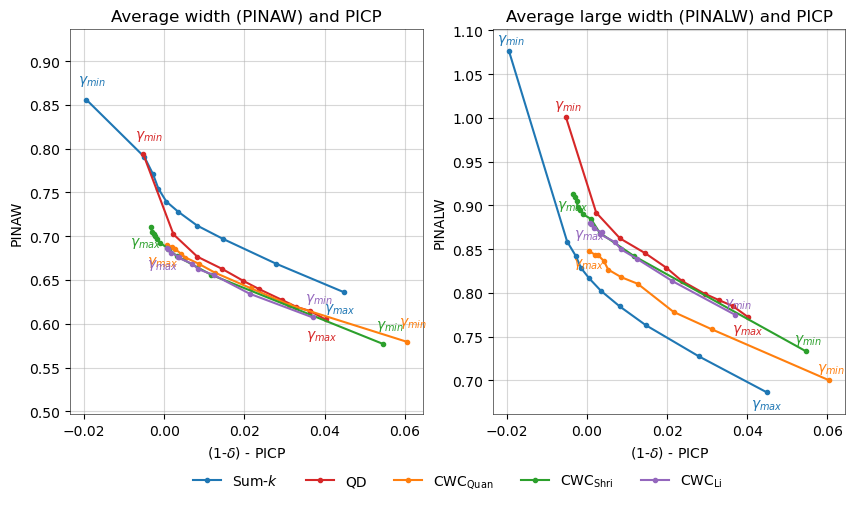

In [7]:
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple']
formname = ['Sum-$k$', 'QD', r'$\text{CWC}_{\text{Quan}}$', r'$\text{CWC}_{\text{Shri}}$', r'$\text{CWC}_{\text{Li}}$']
method_list =  [result_sumk, result_qd, result_cwcquan, result_cwcshri, result_cwcli]

delta = 0.1
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
min_max_array = np.zeros((len(method_list), 3, 2))

for i, method in enumerate(method_list):
    PICP_plot = np.mean(method['PICP_val'], axis = -1)
    PINAW_plot = np.mean(method['PINAW'], axis = -1)
    PINALW_plot = np.mean(method['PINALW'], axis = -1)
    quantile = 0.5
    PINMW_plot = np.mean(np.quantile(method['PIwidth'], q = quantile, axis = 0), axis = -1)
    
    ax[0].plot((1-delta) - PICP_plot, PINAW_plot, marker = '.', label = formname[i], color = color_list[i])
    ax[0].set_title('Average width (PINAW) and PICP')
    ax[0].set_ylabel('PINAW')
    min_max_array[i, 0, 0] = np.min(PINAW_plot)
    min_max_array[i, 0, 1] = np.max(PINAW_plot)

    ax[1].plot((1-delta) - PICP_plot, PINALW_plot, marker = '.', label = formname[i], color = color_list[i])
    ax[1].set_title('Average large width (PINALW) and PICP')
    ax[1].set_ylabel('PINALW')
    min_max_array[i, 1, 0] = np.min(PINALW_plot)
    min_max_array[i, 1, 1] = np.max(PINALW_plot)
    gamma_values = method['gamma']
    
    ax[0].text((1 - delta) - PICP_plot[0] + 0.005, PINAW_plot[0] + 0.03, f'$\gamma_{{min}}$',
               color=color_list[i], fontsize=10, ha='right', va='top')
    ax[0].text((1 - delta) - PICP_plot[-1] - 0.005, PINAW_plot[-1] - 0.01, f'$\gamma_{{max}}$',
               color=color_list[i], fontsize=10, ha='left', va='top')

    ax[1].text((1 - delta) - PICP_plot[0] + 0.004, PINALW_plot[0] + 0.005, f'$\gamma_{{min}}$',
               color=color_list[i], fontsize=10, ha='right', va='bottom')
    ax[1].text((1 - delta) - PICP_plot[-1] - 0.004, PINALW_plot[-1] - 0.005, f'$\gamma_{{max}}$',
               color=color_list[i], fontsize=10, ha='left', va='top')
    
# range_array = min_max_array[:,:,1] - min_max_array[:,:,0]
min_element = np.min(min_max_array[:, :, 0], axis = 0)
max_element = np.max(min_max_array[:, :, 1], axis = 0)
range_array = max_element - min_element

# # Set same limits and ticks for all axes
maxrange_all = np.max(range_array) 
add_range = (maxrange_all - range_array)/2 + 0.025

for i in range(2):
#     ax[i].set_xlim(xlim)
    ax[i].set_ylim((min_element[i] - add_range[i], max_element[i] + add_range[i]))
    ax[i].grid(True, which = 'both', alpha = 0.5)
    ax[i].set_xlabel(r'(1-$\delta$) - PICP')
#     ax[i].legend(loc = 'upper right')
ax[1].legend(loc='upper center', fontsize=10, ncol=5, bbox_to_anchor=(-0.1, -0.12), frameon = False)
for axis in ax:
    for spine in axis.spines.values():
        spine.set_linewidth(0.4)
plt.show()

# report_savefig(f'tradeoffcurve_dgp{dgpresult_key}', resultfolderpath = figurefolderpath)

# PI characteristics

For Sum-$k$: gamma = 0.1333
For QD: gamma = 0.0056
For $\text{CWC}_{\text{Quan}}$: gamma = 6.6667
For $\text{CWC}_{\text{Shri}}$: gamma = 2.9444
For $\text{CWC}_{\text{Li}}$: gamma = 6.6667


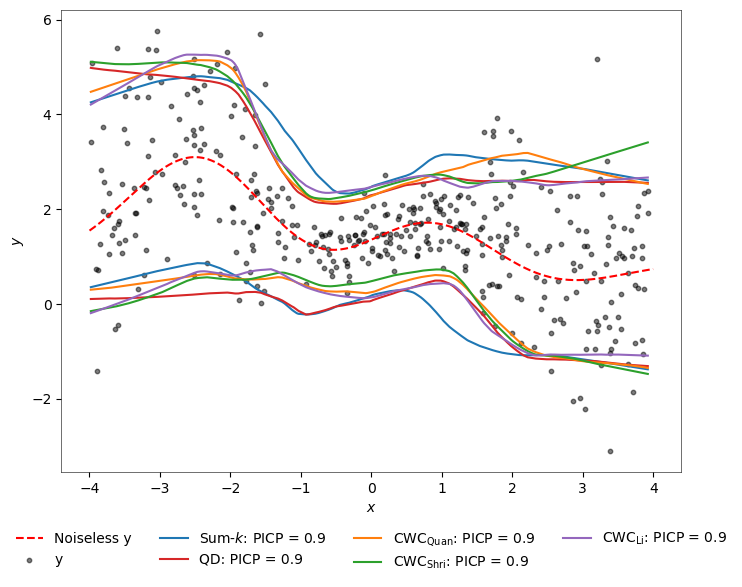

In [8]:
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple']
formname = ['Sum-$k$', 'QD', r'$\text{CWC}_{\text{Quan}}$', r'$\text{CWC}_{\text{Shri}}$', r'$\text{CWC}_{\text{Li}}$']
method_list =  [result_sumk, result_qd, result_cwcquan, result_cwcshri, result_cwcli]

dataindex = 35
picp_target = 0.9
train = trainer(num_epochs = 2000, batch_size = 2000, patience = 200) #Set the trainer

fig, ax = plt.subplots(figsize=(8, 6))
for i, method in enumerate(method_list):
    xplot, yplot = train.sort_x_toplot(method['allxval'][:, :, dataindex], method['allyval'][:, dataindex])
    if x.shape[1] > 1:
        sampleplot = 20  # For a multivariate function only
        xindex_plot = np.arange(x[:sampleplot].shape[0], dtype=int)
        xplot = xindex_plot
        ax.set_xlabel(r'Sample index')
        x_all = xindex_plot
    else:
        sampleplot = None
        ax.set_xlabel(r'$x$')
        x_all = x
    if i == 0:
        ax.plot(x_all, y_true[:sampleplot], color='red', linestyle='dashed', label='Noiseless y')
        ax.scatter(xplot, yplot[:sampleplot], s=10, alpha=0.5, color='black', label='y')
        
    index_gamma = np.argmin(np.abs(method['PICP_val'][:, dataindex] - picp_target))
    if index_gamma == 0 and method['gamma'][index_gamma] < 1e-4:
        index_gamma += 1
    gamma_plot = method['gamma'][index_gamma]
    print(f'For {formname[i]}: gamma = {round(gamma_plot, 4)}')
    picp_gamma = round(method['PICP_val'][index_gamma, dataindex], 3)
    upper = method['outputs_val'][:sampleplot, 1, index_gamma, dataindex]
    lower = method['outputs_val'][:sampleplot, 0, index_gamma, dataindex]
    ax.plot(xplot, upper, color=color_list[i], label=f'{formname[i]}: PICP = {picp_gamma}')
    ax.plot(xplot, lower, color=color_list[i])

ax.set_ylabel(r'$y$')

# Move the legend below the plot with two columns
ax.legend(loc='upper center', fontsize=10, ncol=4, bbox_to_anchor=(0.5, -0.1), frameon = False)

for spine in ax.spines.values():
    spine.set_linewidth(0.4)
plt.show()

# report_savefig(f'piresult_dgp{dgpresult_key}', resultfolderpath = figurefolderpath)

# PI width Histogram

For QR
For QRF
For MVE
For DIC
For QD: gamma = 0.0056
For $\text{CWC}_{\text{Quan}}$: gamma = 10.0
For $\text{CWC}_{\text{Shri}}$: gamma = 3.6667
For $\text{CWC}_{\text{Li}}$: gamma = 10.0


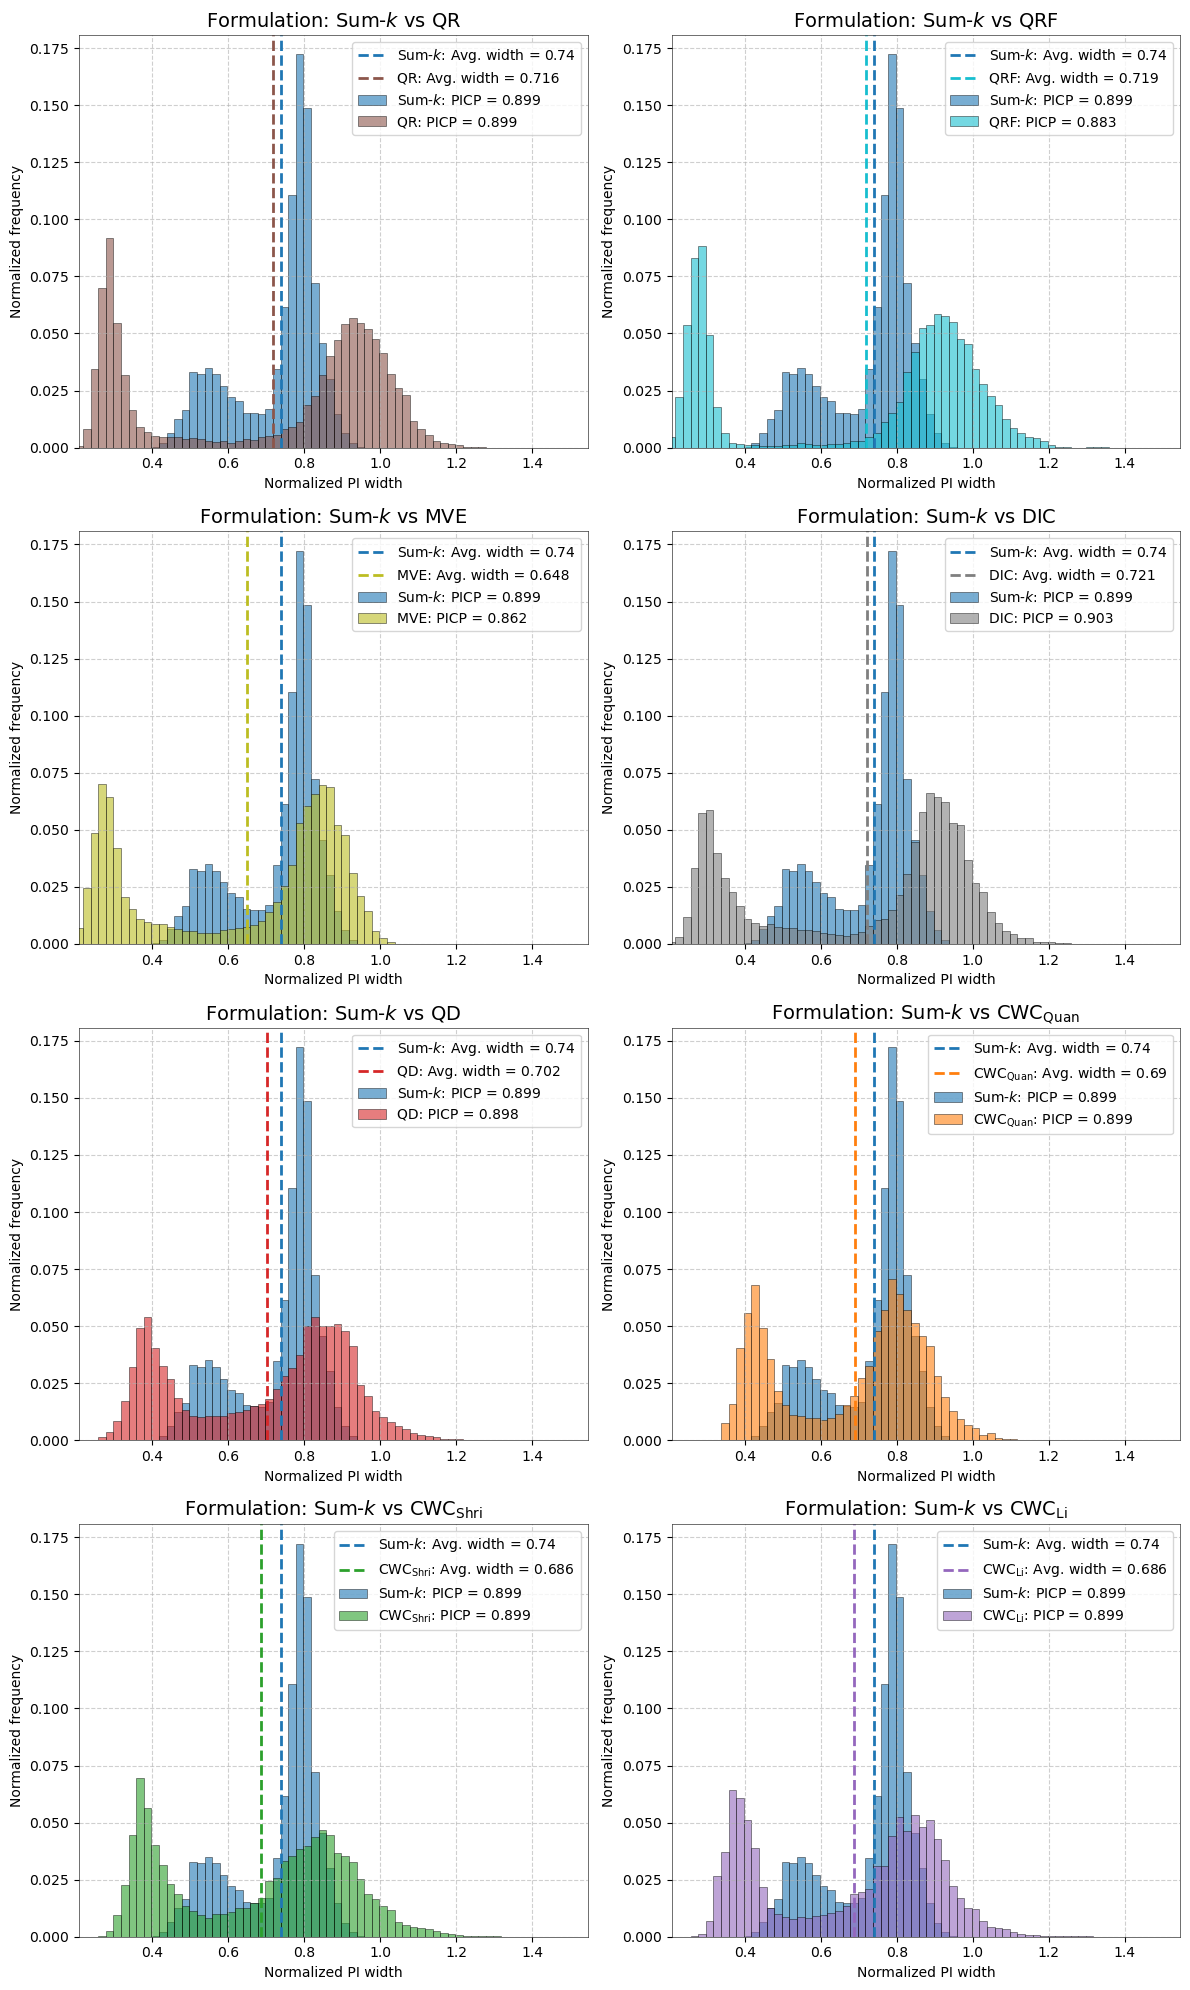

In [9]:
color_list = ['tab:blue', 'tab:brown', 'tab:cyan', 'tab:olive', 'tab:gray', 'tab:red', 'tab:orange', 'tab:green', 'tab:purple']
formname = ['Sum-$k$', 'QR', 'QRF', 'MVE', 'DIC', 'QD', r'$\text{CWC}_{\text{Quan}}$', r'$\text{CWC}_{\text{Shri}}$', r'$\text{CWC}_{\text{Li}}$']
method_list = [result_sumk, result_qr, result_qrf, result_mve, result_dic, result_qd, result_cwcquan
               , result_cwcshri, result_cwcli]

# fig = PIhistogramplot_vertical(method_list, formname, color_list, picp_target = 0.9)
fig = PIhistogramplot_table(method_list, formname, color_list, picp_target = 0.9, graphborderwidth = 0.4)
plt.show()
# report_savefig(f'hist_piwidth_dgp{dgpresult_key}', resultfolderpath = figurefolderpath)